In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
file_path = "D:\\cricket_score_predictor-main\\t20i_info.csv"  # Update with your file path if needed
df = pd.read_csv(file_path)

In [3]:
# Fill missing city values using venue information
df['city'] = df['city'].fillna(df['venue'].apply(lambda x: x.split(' ')[0]))

In [4]:
# Filtering cities with more than 600 occurrences
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()
df = df[df['city'].isin(eligible_cities)]

In [5]:
# Creating cumulative score and wickets left
df['current_score'] = df.groupby('match_id')['runs'].cumsum()
df['over'] = df['ball'].apply(lambda x: str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x: str(x).split(".")[1])
df['ball_bowled'] = (df['over'].astype(int) * 6 + df['ball_no'].astype(int))
df['balls_left'] = 120 - df['ball_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)

In [6]:
# Handling player dismissals
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 1 if x != '0' else 0)
df['player_dismissed'] = df['player_dismissed'].astype(int)
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()
df['wicket_left'] = 10 - df['player_dismissed']

In [7]:
# Calculating current run rate
df['current_run_rate'] = (df['current_score'] * 6) / df['ball_bowled']

In [8]:
# Computing last five overs' runs
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
df['runs'] = df['runs'].fillna(0)

In [9]:
groups = df.groupby('match_id')
match_ids = df['match_id'].unique()
last_five = []


In [10]:
for id in match_ids:
    last_five.extend(groups.get_group(id)['runs'].rolling(window=30).sum().values.tolist())

In [11]:
df['last_five'] = last_five

In [12]:
# Creating final dataset for visualization
final_df = df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wicket_left',
               'current_run_rate', 'last_five', 'runs']]

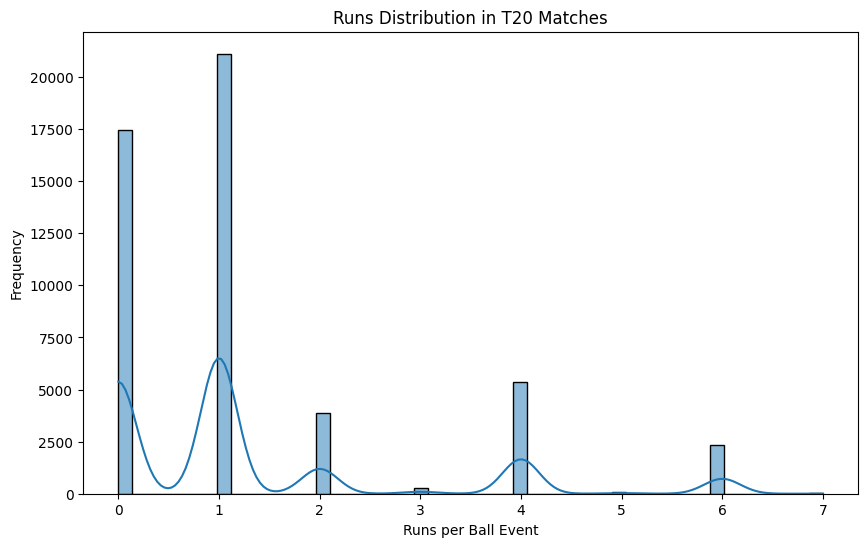

In [13]:
# Visualization 1: Runs Distribution
plt.figure(figsize=(10, 6))
sns.histplot(final_df['runs'], bins=50, kde=True)
plt.xlabel("Runs per Ball Event")
plt.ylabel("Frequency")
plt.title("Runs Distribution in T20 Matches")
plt.show()

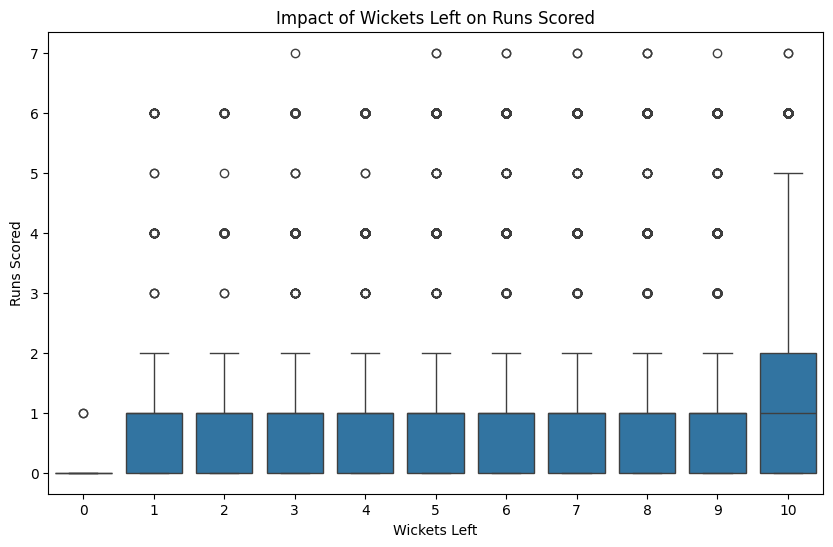

In [14]:
# Visualization 2: Wickets Left vs. Runs Scored
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_df['wicket_left'], y=final_df['runs'])
plt.xlabel("Wickets Left")
plt.ylabel("Runs Scored")
plt.title("Impact of Wickets Left on Runs Scored")
plt.show()

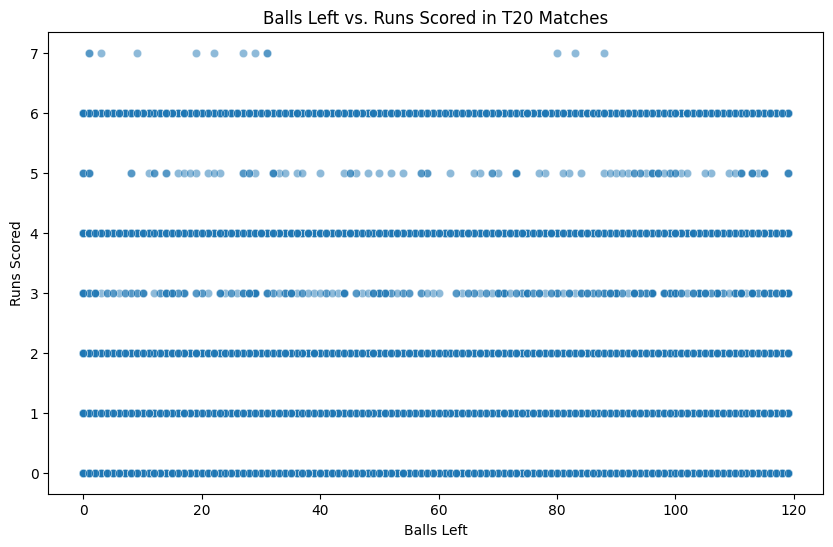

In [15]:
# Visualization 3: Balls Left vs. Runs Scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['balls_left'], y=final_df['runs'], alpha=0.5)
plt.xlabel("Balls Left")
plt.ylabel("Runs Scored")
plt.title("Balls Left vs. Runs Scored in T20 Matches")
plt.show()

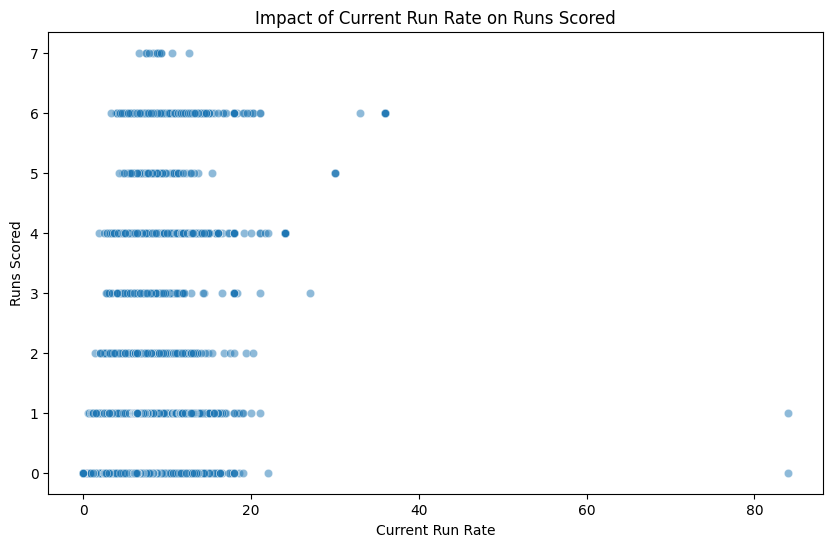

In [16]:
# Visualization 4: Current Run Rate vs. Runs Scored
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['current_run_rate'], y=final_df['runs'], alpha=0.5)
plt.xlabel("Current Run Rate")
plt.ylabel("Runs Scored")
plt.title("Impact of Current Run Rate on Runs Scored")
plt.show()

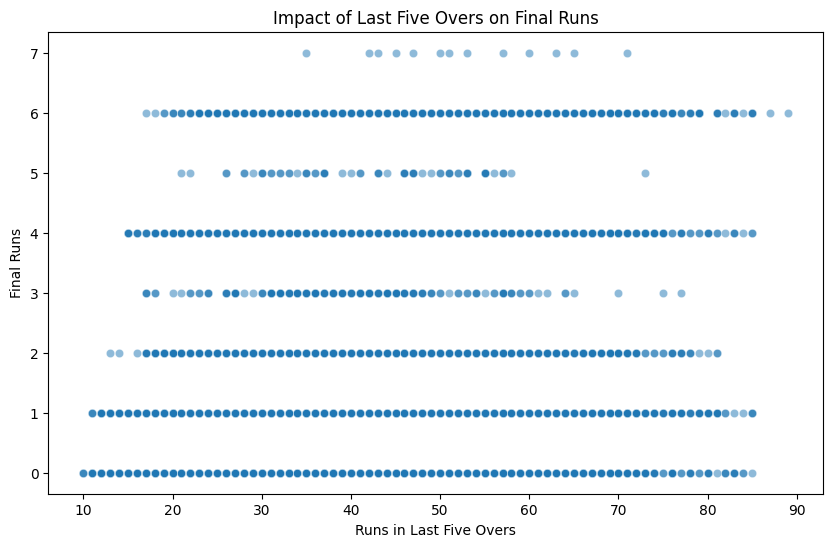

In [17]:
# Visualization 5: Last Five Over Runs vs. Final Runs
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_df['last_five'], y=final_df['runs'], alpha=0.5)
plt.xlabel("Runs in Last Five Overs")
plt.ylabel("Final Runs")
plt.title("Impact of Last Five Overs on Final Runs")
plt.show()

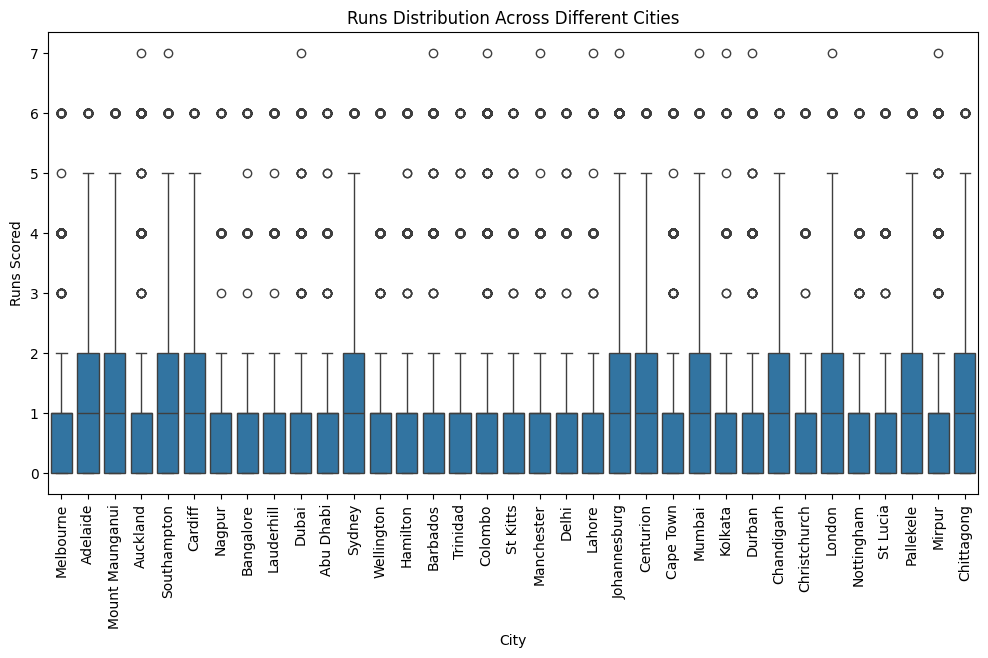

In [18]:
# Visualization 6: Runs Scored by City
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_df['city'], y=final_df['runs'])
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Runs Scored")
plt.title("Runs Distribution Across Different Cities")
plt.show()

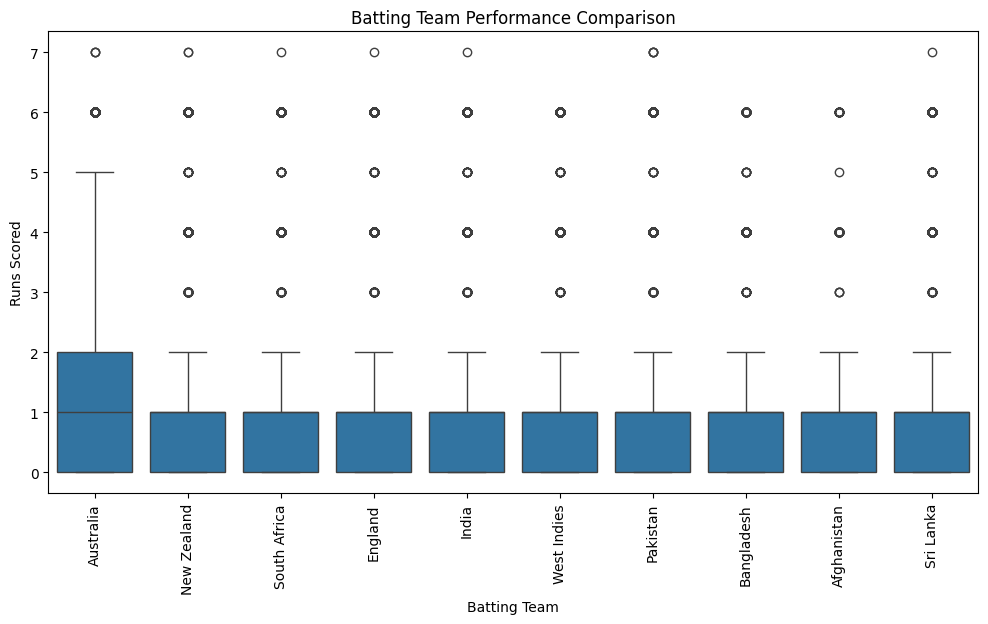

In [19]:
# Visualization 7: Batting Team Performance Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_df['batting_team'], y=final_df['runs'])
plt.xticks(rotation=90)
plt.xlabel("Batting Team")
plt.ylabel("Runs Scored")
plt.title("Batting Team Performance Comparison")
plt.show()

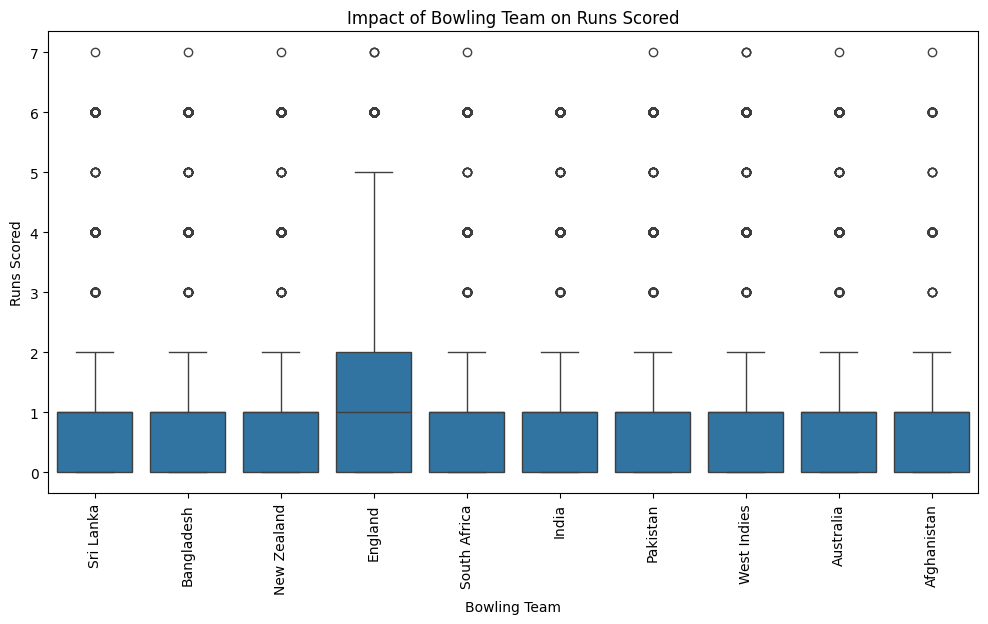

In [20]:
# Visualization 8: Bowling Team Impact on Runs Scored
plt.figure(figsize=(12, 6))
sns.boxplot(x=final_df['bowling_team'], y=final_df['runs'])
plt.xticks(rotation=90)
plt.xlabel("Bowling Team")
plt.ylabel("Runs Scored")
plt.title("Impact of Bowling Team on Runs Scored")
plt.show()

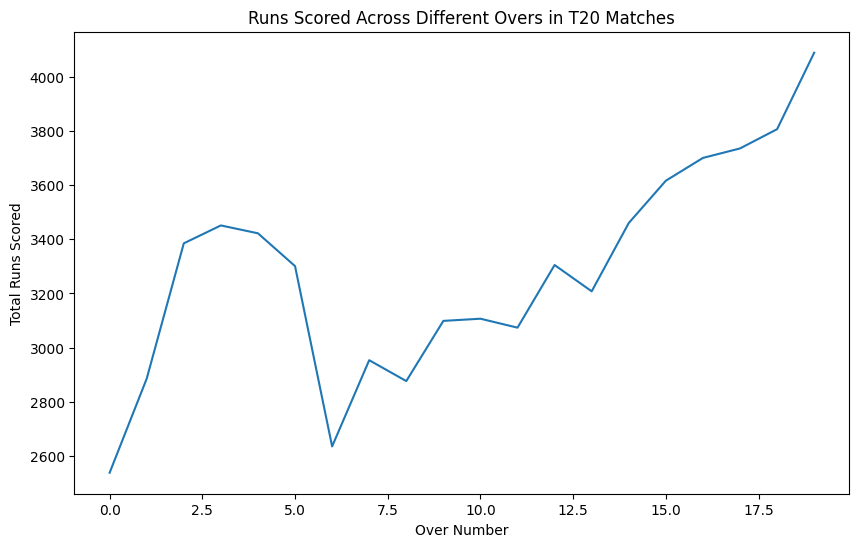

In [21]:
# Visualization 9: Runs Scored in Different Overs
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['over'].astype(int), y=df['runs'], estimator='sum', errorbar=None)
plt.xlabel("Over Number")
plt.ylabel("Total Runs Scored")
plt.title("Runs Scored Across Different Overs in T20 Matches")
plt.show()

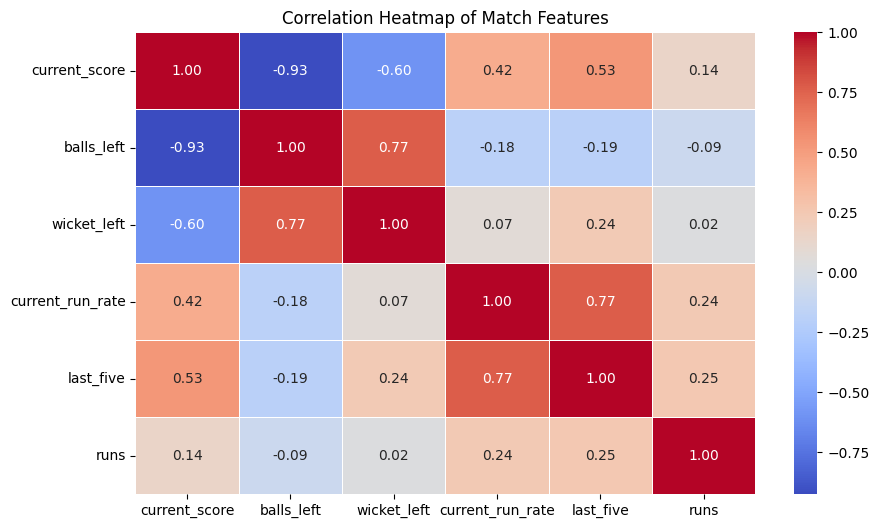

In [22]:
# Visualization 10: Correlation Heatmap of Numeric Features
plt.figure(figsize=(10, 6))
sns.heatmap(final_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Match Features")
plt.show()